# Detecção de Fraude em Transações Bancárias

In [2]:
# Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, recall_score, f1_score, classification_report, confusion_matrix

In [4]:
# Carregar dados
# Fonte de dados: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download
df = pd.read_csv('../../datasets/creditcard.csv')

In [ ]:
# Verificar dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Análise Exploratória
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Distribuição das classes
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

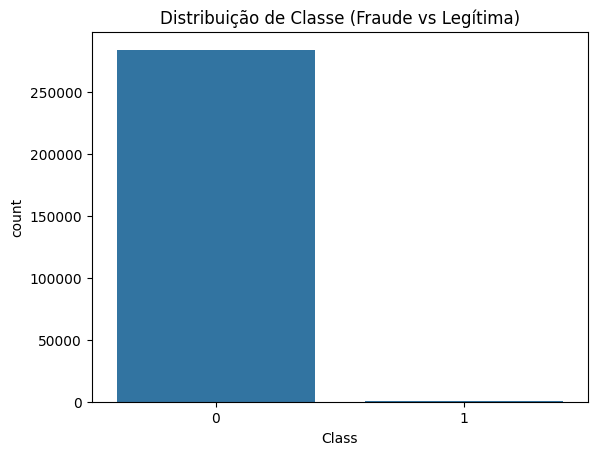

In [8]:
# Plot da distribuição das classes
sns.countplot(x='Class', data=df)
plt.title('Distribuição de Classe (Fraude vs Legítima)')
plt.show()

In [9]:
# Divisão em Features e Rótulo
X =df.drop('Class', axis=1)
y = df['Class']

In [10]:
# Divisão em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
# Padronização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Treinamento do Modelo Regressão Logística
logistic = LogisticRegression(max_iter=1000, class_weight='balanced')

In [13]:
logistic.fit(X_train_scaled, y_train)
y_pred_log = logistic.predict(X_test_scaled)

In [14]:
# Avaliação do Modelo
accuracy_score(y_test, y_pred_log)

0.9755275446789088

In [16]:
recall_score(y_test, y_pred_log)

np.float64(0.9183673469387755)

In [17]:
f1_score(y_test, y_pred_log)

np.float64(0.11435832274459974)

In [20]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



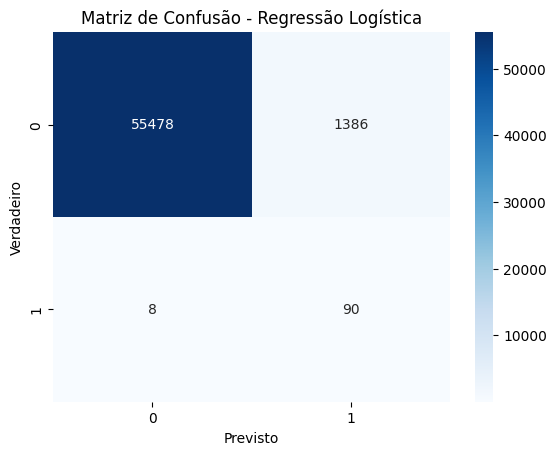

In [21]:
# Matriz de Confusão
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

In [22]:
# Treinamento - Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train_scaled,y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [23]:
# Avaliação
accuracy_score(y_test, y_pred_rf)

0.9995084442259752

In [24]:
recall_score(y_test, y_pred_rf)

np.float64(0.7448979591836735)

In [25]:
f1_score(y_test, y_pred_rf)

np.float64(0.8390804597701149)

In [26]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



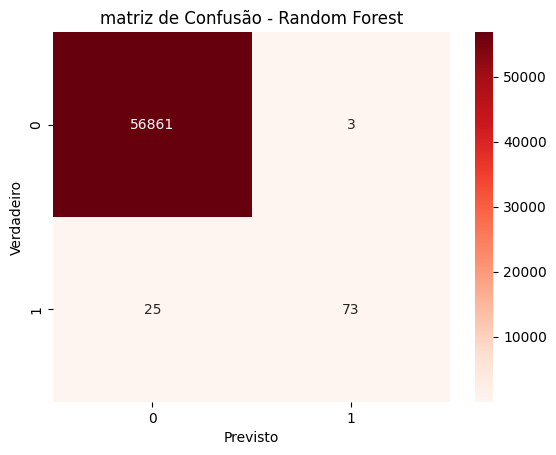

In [27]:
# Matriz de confusão  - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds')
plt.title('matriz de Confusão - Random Forest')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()